In [2]:
#Lending club case study

#Importing the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [4]:
#load the data and print the list of columns.
loans = pd.read_csv('loan_dataset.csv', low_memory=False)
print(list(loans))

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il

In [8]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [9]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [13]:
#Finding null columns in the total of 111.
loans.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [16]:
# remove all the columns with full null values from the data set
loans.dropna(how='all',axis = 1 , inplace = True)
print(loans.shape)
print("the columns are reduced to 57 after removing the null values from the original data")

(39717, 57)
the columns are reduced to 57 after removing the null values from the original data


In [21]:
#There will be a lot of columns which may not be useful to the analysis. Identifying and removing them.

In [24]:
#Listing all columns.
loans.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [40]:
#percentage of missing values across columns
round(loans.isnull().sum()/len(loans.index)*100,2).sort_values(ascending=False)   

revol_util             0.13
loan_amnt              0.00
funded_amnt_inv        0.00
pub_rec                0.00
open_acc               0.00
inq_last_6mths         0.00
earliest_cr_line       0.00
dti                    0.00
addr_state             0.00
purpose                0.00
loan_status            0.00
issue_d                0.00
verification_status    0.00
annual_inc             0.00
home_ownership         0.00
emp_length             0.00
sub_grade              0.00
grade                  0.00
installment            0.00
int_rate               0.00
term                   0.00
total_acc              0.00
dtype: float64

In [29]:
#Checking the remaining columns.
loans.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc'],
      dtype='object')

In [30]:
loans.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [32]:
#Rows with loan-status as Current is not necessary. Removing them.
loans = loans[loans.loan_status!='Current']
loans.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [33]:
loans.shape

(38577, 22)

In [34]:
#Let's identify the missing values.

In [35]:
loans.isna().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1033
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
earliest_cr_line          0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
dtype: int64

In [36]:
#Filling the missing values in the emp_length column with mode:
loans.emp_length.fillna(loans.emp_length.mode()[0],inplace=True) #code for mode calc
loans.emp_length.isna().sum() #code for missing values identification

/Users/vam/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0

In [42]:
#dropping the missing values in the 'revol_util' column:
loans.dropna(subset=['revol_util'],inplace=True)
loans.revol_util.isna().sum()

/Users/vam/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


0

In [44]:
#Checking shape after dropping.
loans.shape

(38527, 22)

In [45]:
#Standardizing the values in the columns:
#We have columns 'int_rate','emp_length','revol_util' to be standardized into either float or int.

#applying lambda funtion for removing the '%' symbol in int_rate column
loans.int_rate = pd.to_numeric(loans.int_rate.apply(lambda x : x[:-1]))

/Users/vam/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [53]:
#applying lambda funtion for removing the '%' symbol in revol_util column
loans.revol_util = pd.to_numeric(loans.revol_util.apply(lambda x : x[:-1]))

In [55]:
#Standardizing the emp_length column: The emp_lenth column contains of both numerics and characters, 
#hence writing a function block to remove the character elements from the string.

In [56]:
#funtion to remove the characters from the string leaving numbers:
def str2digit(x):
    if x == '< 1 year':
        return 0
    else:
        for s in x.split():
            if s.isdigit():
                return s
            if s == '10+':
                return s.split('+')[0]

In [57]:
#Assigning the emp_length data to the column in the loans dataset
loans.emp_length = pd.to_numeric(loans.emp_length.apply(str2digit))

In [58]:
loans.term = pd.to_numeric(loans.term.apply(str2digit))

In [59]:
loans.home_ownership.value_counts()

RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

In [60]:
loans.home_ownership = loans.home_ownership.apply(lambda x: "OTHER" if x =="NONE" else x)
loans.home_ownership.value_counts()

RENT        18448
MORTGAGE    17010
OWN          2970
OTHER          99
Name: home_ownership, dtype: int64

In [25]:
#creating a column as loan_status_num in which 0-fullypaid 1-chargedoff
loans['loan_status_num']=loans.loan_status.apply(lambda x:0 if x=="Fully Paid" else 1)

In [24]:
#creating a column as sub_grade_num in which it will have only numeric data
loans['sub_grade_num'] = loans.sub_grade.apply(lambda x: list(x)[-1])

In [23]:
loans['year']=loans.issue_d.apply(lambda x: datetime.strptime(x,'%b-%y').year)
loans['month']=loans.issue_d.apply(lambda x: x.split('-')[0])

In [65]:
#SANITISATION
#checking whether installment is greater than loan amount
loans[loans['installment']>loans['loan_amnt']]!=False

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,loan_status_num,sub_grade_num,year,month


In [66]:
#SANITISATION
#checking whether installment is greater than funded amount
loans=loans[loans['installment']<loans['funded_amnt_inv']]

In [70]:
#Univariate Analysis
#Univariate Analysis on Categorical Variables

In [79]:
#We'll be analysing variable one variable at a time as it is important to seperately understand each variable before moving on to analysing multiple variables together.

#Ordered Variables ==> Grade,Subgrade,Month
#Unordered variables ==>purpose,home_ownership
#Quantitative variables ==> annual_inc,open_acc,total_acc


<function matplotlib.pyplot.show(close=None, block=None)>

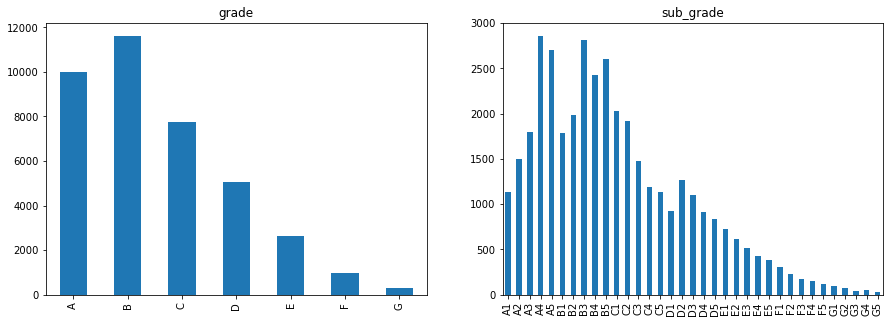

In [80]:
plt.figure(figsize=[15,5])

plt.subplot(1, 2, 1)
grade_order=sorted(list(loans.grade.unique()))
loans.grade.value_counts().reindex(grade_order).plot.bar()
plt.title('grade', fontsize=12)

plt.subplot(1, 2, 2)
loans.sub_grade.value_counts().reindex(sorted(list(loans.sub_grade.unique()))).plot.bar()
plt.title('sub_grade', fontsize=12)

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

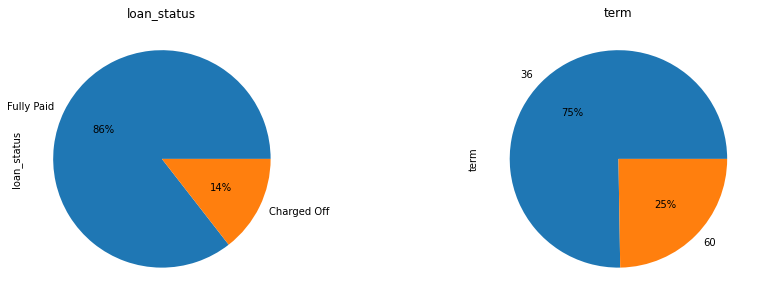

In [81]:
plt.figure(figsize=[15,5])

#Univariate Analysis on Loan-status
plt.subplot(1, 2, 1)
loans.loan_status.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('loan_status', fontsize=12)

#Univariate Analysis on term
plt.subplot(1, 2, 2)
loans.term.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('term', fontsize=12)

plt.show

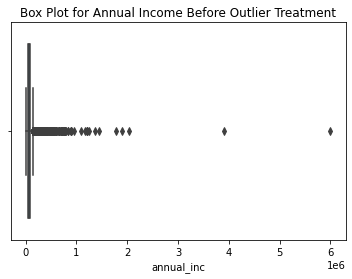

In [82]:
#Box Plot for Annual Income Before Outlier Treatment
ax = sns.boxplot(loans['annual_inc'])
ax.set_title("Box Plot for Annual Income Before Outlier Treatment")
plt.show()

In [85]:
#we can see clearly there are outliers in annual income when we see at box plot so 
#we will find the IQR to remove outliers

In [86]:
#IQR calculation
Q1 = loans.annual_inc.quantile(0.25)
Q3 = loans.annual_inc.quantile(0.75)
IQR = Q3-Q1
Lower_bound = Q1-1.5*IQR
Upper_bound = Q3+1.5*IQR
loans = loans[loans['annual_inc']<Upper_bound]

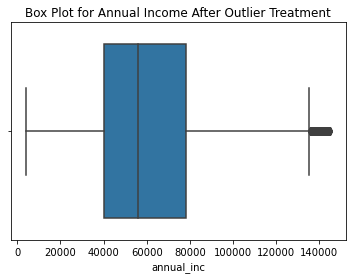

In [87]:
#Box Plot for Annual Income After Outlier Treatment
ax = sns.boxplot(loans['annual_inc'])
ax.set_title("Box Plot for Annual Income After Outlier Treatment")
plt.show()

In [88]:
#Similarly check for other columns like intr_rate,funded_amnt_inv,loan_amnt

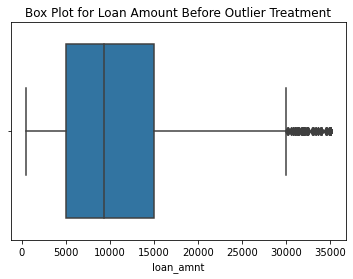

In [89]:
#Box Plot for Loan Amount Before Outlier Treatment
ax = sns.boxplot(loans['loan_amnt'])
ax.set_title("Box Plot for Loan Amount Before Outlier Treatment")
plt.show()

In [90]:
#IQR calculation
Q1 = loans.loan_amnt.quantile(0.25)
Q3 = loans.loan_amnt.quantile(0.75)
IQR = Q3-Q1
Lower_bound = Q1-1.5*IQR
Upper_bound = Q3+1.5*IQR
loans = loans[loans['loan_amnt']<Upper_bound]

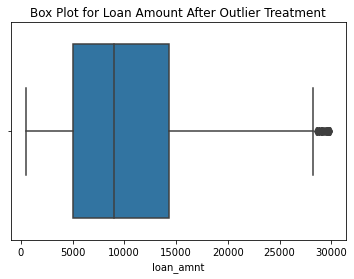

In [91]:
#Box Plot for Loan Amount After Outlier Treatment
ax = sns.boxplot(loans['loan_amnt'])
ax.set_title("Box Plot for Loan Amount After Outlier Treatment")
plt.show()

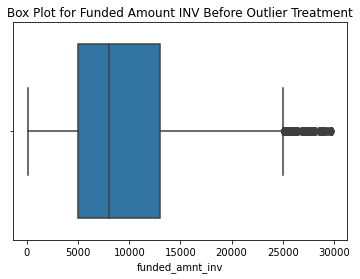

In [92]:
#Box Plot for Funded Amount INV Before Outlier Treatment
ax = sns.boxplot(loans['funded_amnt_inv'])
ax.set_title("Box Plot for Funded Amount INV Before Outlier Treatment")
plt.show()

In [93]:
#IQR calculation
Q1 = loans.funded_amnt_inv.quantile(0.25)
Q3 = loans.funded_amnt_inv.quantile(0.75)
IQR = Q3-Q1
Lower_bound = Q1-1.5*IQR
Upper_bound = Q3+1.5*IQR
loans = loans[loans['funded_amnt_inv']<Upper_bound]

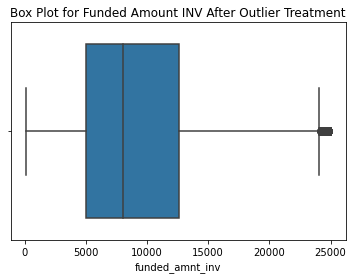

In [94]:
#Box Plot for Funded Amount INV After Outlier Treatment
ax = sns.boxplot(loans['funded_amnt_inv'])
ax.set_title("Box Plot for Funded Amount INV After Outlier Treatment")
plt.show()

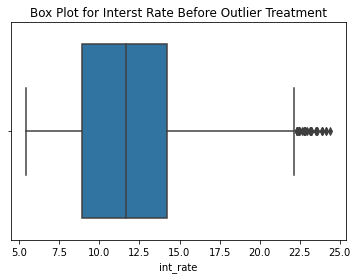

In [95]:
#Box Plot for Interst Rate Before Outlier Treatment
ax = sns.boxplot(loans['int_rate'])
ax.set_title("Box Plot for Interst Rate Before Outlier Treatment")
plt.show()

In [96]:
#IQR calculation
Q1 = loans.int_rate.quantile(0.25)
Q3 = loans.int_rate.quantile(0.75)
IQR = Q3-Q1
Lower_bound = Q1-1.5*IQR
Upper_bound = Q3+1.5*IQR
loans = loans[loans['int_rate']<Upper_bound]

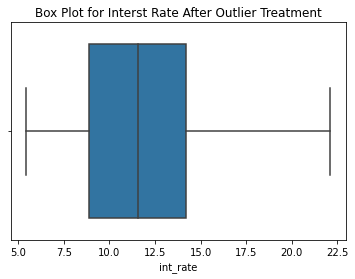

In [97]:
#Box Plot for Interst Rate After Outlier Treatment
ax = sns.boxplot(loans['int_rate'])
ax.set_title("Box Plot for Interst Rate After Outlier Treatment")
plt.show()

In [98]:
#Analysing home-ownership, years of experience and purpose of loan.

<function matplotlib.pyplot.show(close=None, block=None)>

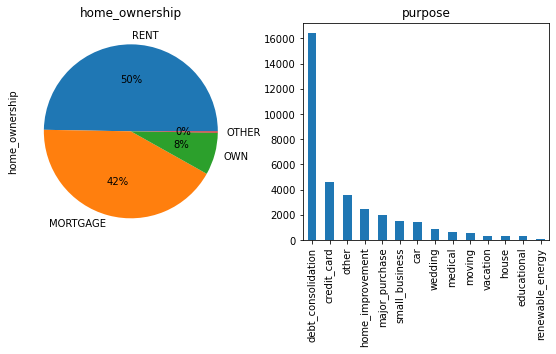

In [104]:
plt.figure(figsize=[15,4])

plt.subplot(1, 3, 2)
loans.home_ownership.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('home_ownership', fontsize=12)

plt.subplot(1, 3, 3)
loans.purpose.value_counts().plot.bar()
plt.title('purpose', fontsize=12)

plt.show

In [106]:
loans.emp_length.unique()

array([10,  0,  3,  8,  9,  4,  5,  1,  6,  2,  7])

Text(0.5, 1.0, 'emp_length')

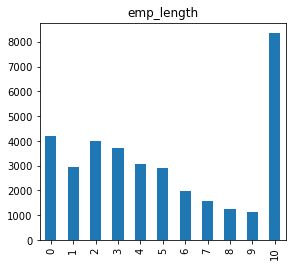

In [113]:
plt.figure(figsize=[15,4])

plt.subplot(1, 3, 1)
emp_length_order=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
loans.emp_length.value_counts().reindex(emp_length_order).plot.bar()
plt.title('emp_length', fontsize=12)

In [11]:
#Observations from above plots.
#1. Number of accepted applications decreases with the years of employment indicates the decrease in the need of loans.
#2. Observed that 10 and above years of experienced people got more loans possibly due to the purchase of new house.
#3. Customers with rented/mortaged houses are accepted with loans the most and loans are requested mostly for debt consolidation.

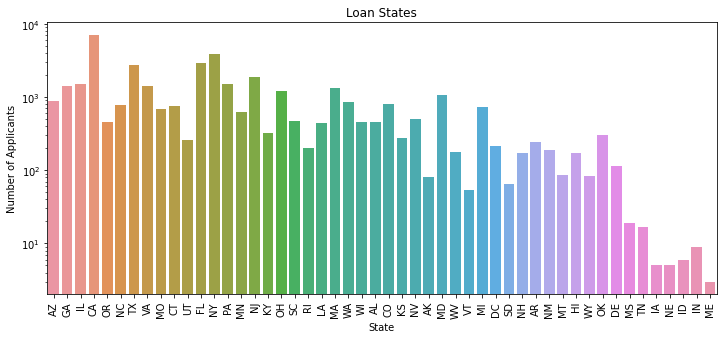

In [73]:
plt.figure(figsize=(12,5))
cp = sns.countplot(data = loans,x="addr_state")
cp.set_title("Loan States")
cp.set(ylabel="Number of Applicants",xlabel="State")
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [13]:
#Observation: From the above plot, we can infer that most loan taking customers are from CA.

In [33]:
#Bivariate Analysis

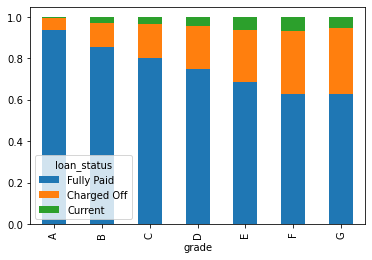

In [36]:
#Grade vs Loan Status
pivot_ = pd.pivot_table(data=loans,values='id',index='grade',columns='loan_status', aggfunc='count')
pivot_pc=pivot_[list(loans.loan_status.unique())].apply(lambda x: x/x.sum(),axis=1)

pivot_pc.plot(kind='bar', stacked=True)
plt.show()

In [37]:
#Observation: From the above plot, we can see that there are more default customers with "B" grade followed by "C","D","A","E","F","G"

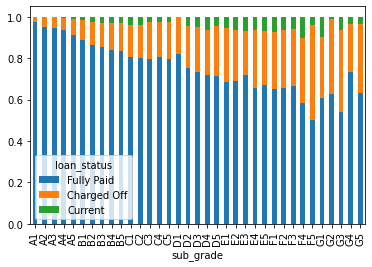

In [39]:
#Sub Grade vs Loan Status
pivot_ = pd.pivot_table(data=loans,values='id',index='sub_grade',columns='loan_status', aggfunc='count')
pivot_pc=pivot_[list(loans.loan_status.unique())].apply(lambda x: x/x.sum(),axis=1)

pivot_pc.plot(kind='bar', stacked=True)
plt.show()

In [40]:
#Observation: From the above plot, it's evident that Chargeoff frequency increases with decline in grades

In [45]:
#Bi-Variate Analysis and Multi-Variate Analysis
#This is to understand the relationship between two variables, which is called bivariate analysis.

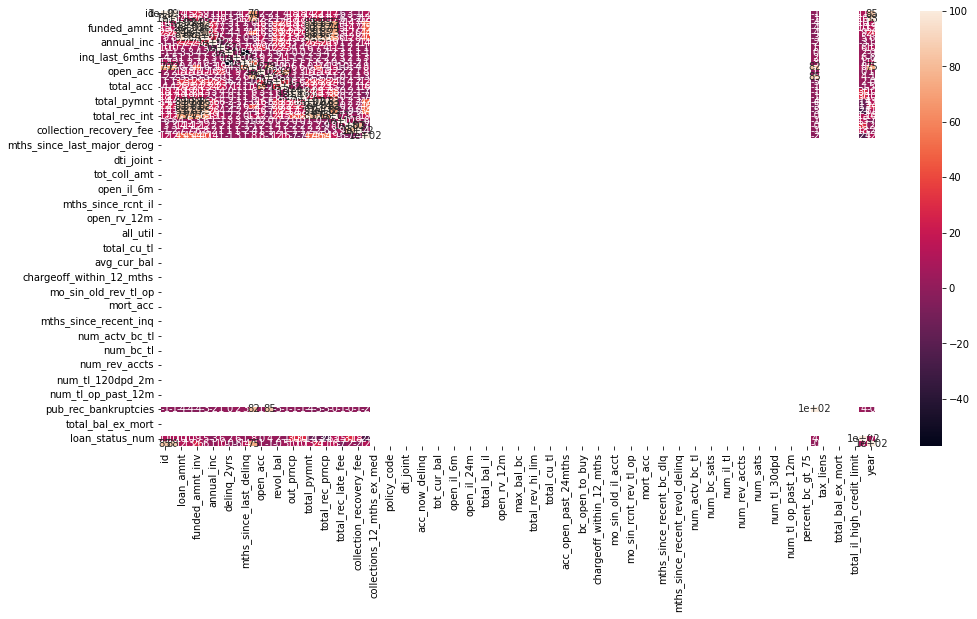

In [55]:
#Co-relation between different variables in the dataset:
corr = round(loans.corr(),2)*100
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot = True)
plt.show()

In [57]:
#Observations from the above plot:
#1. Positive correlation
    #a.loan_amount and installment
    #b.loan_amount and annual income

#2. Negative Correlation
    #a.annual income and dti
    #b.total_acc and interest rate

In [58]:
#Plotting scatter plots to identify each relation.

/Users/vam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


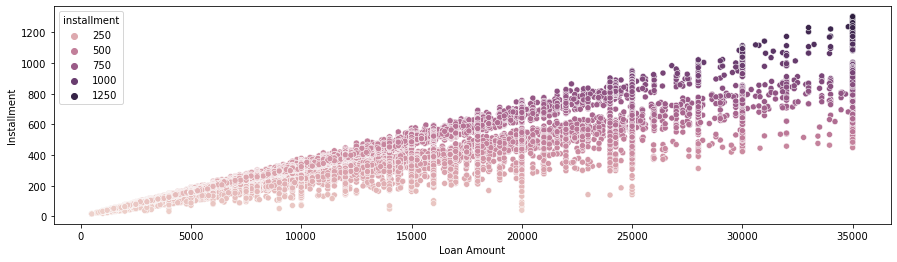

In [59]:
#loan_amount and installment
x=loans.loan_amnt
y = loans.installment
plt.figure(figsize=(15,4))
sns.scatterplot(x, y,hue=y)
plt.xlabel('Loan Amount')
plt.ylabel('Installment')
plt.show()

In [61]:
#Observation: From this plot, we can see that when the loan amount increases , the installment amount 
#also increases along with it which is a positive relation.

/Users/vam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


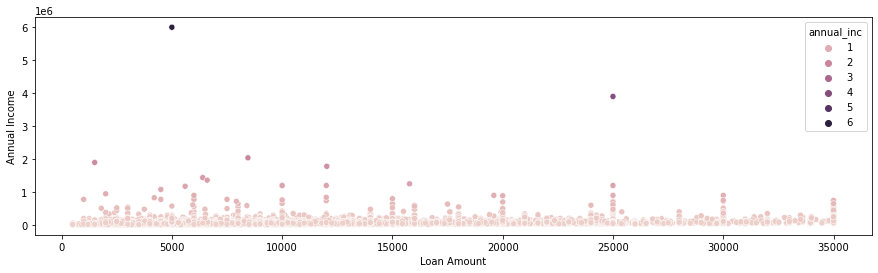

In [62]:
#loan_amount and annual income
x=loans.loan_amnt
y = loans.annual_inc
plt.figure(figsize=(15,4))
sns.scatterplot(x, y,hue=y)

plt.xlabel('Loan Amount')
plt.ylabel('Annual Income')
plt.show()

In [63]:
#Observation: From this plot, we can infer that the customer's taking Loan amount is 
#increasing if their annual income is high.

/Users/vam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


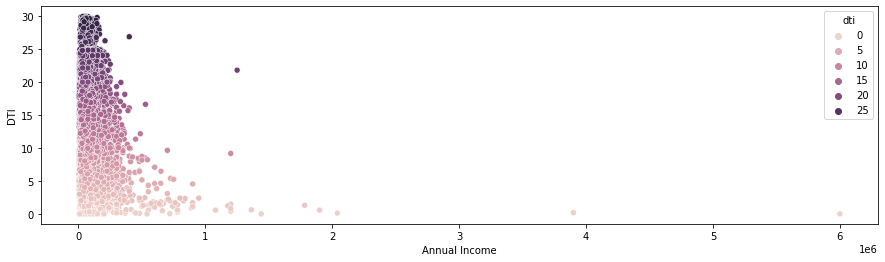

In [64]:
#annual_inc and dti
x=loans.annual_inc
y = loans.dti
plt.figure(figsize=(15,4))
sns.scatterplot(x, y,hue=y)
plt.xlabel('Annual Income')
plt.ylabel('DTI')
plt.show()

In [65]:
#Observation: From Above plot we can see if a person annual income increases then his debt ratio(dti) decreases resulting in negative relation

/Users/vam/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


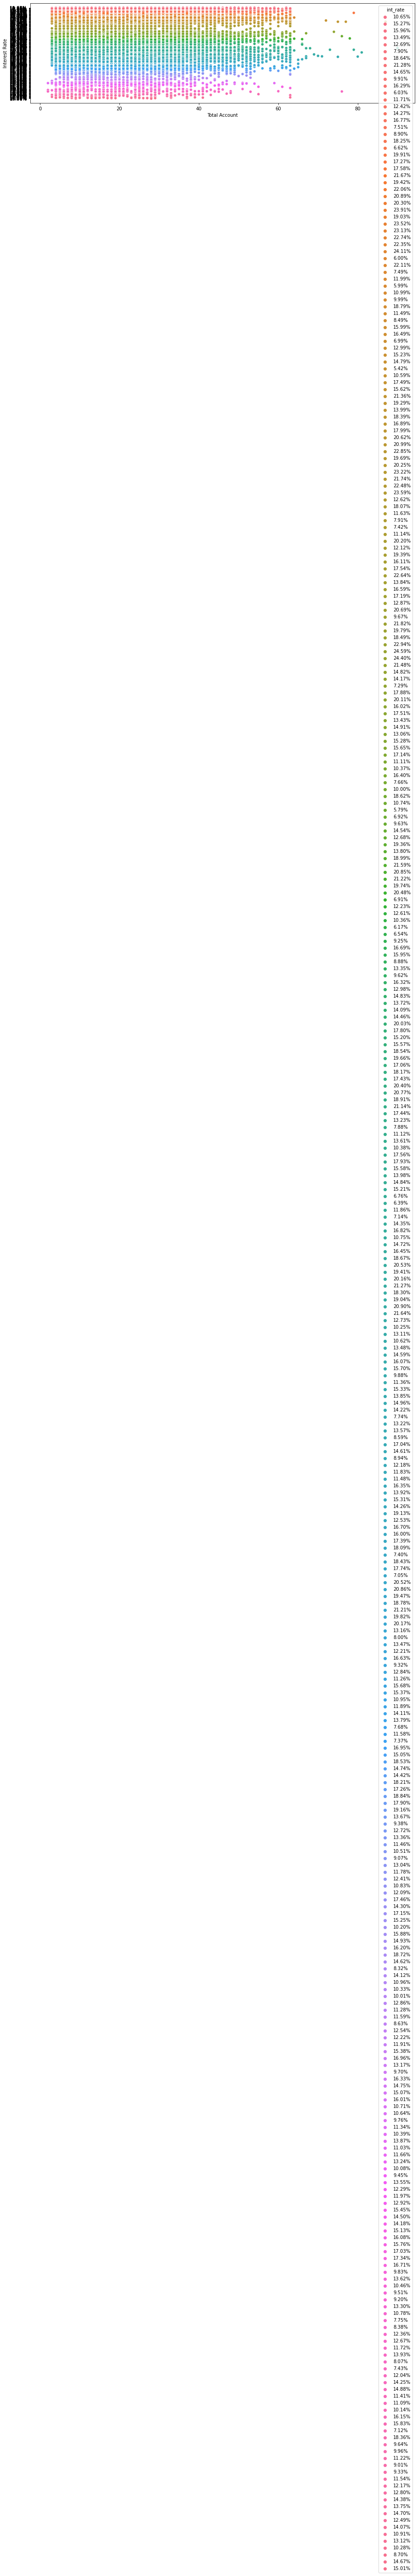

In [66]:
#interest_rate and Total credit lines
x=loans.total_acc
y = loans.int_rate
plt.figure(figsize=(15,4))
sns.scatterplot(x, y,hue=y)
plt.xlabel('Total Account')
plt.ylabel('Interest Rate')
plt.show()

In [67]:
#Observation: From the above plot, we can infer that the interest rate decreases then total credit lines increases

In [71]:
#Conclusion

In [72]:
#Below are the parameters which may lead to increase in the default rate.
#1. Term:
    #It is observed that the charged-off rate increases along with the increase in the term. 
    #Suggestion would be to avoid giving long-term loans considering other parameters.
#2. Annual Income:
    #It is observed that the annual-income is in negative co-relation with the default rate. Lower the annual income,
    #better are the chances of default.
#3. Interest Rate:
    #It is observed that the default rate increases along with the increase in interest rate.
#4. Home Ownership
    #It is observed that the default rate is increased when the home ownership is rented.

In [ ]:
#Recommendations
#1. Providing loans to employees with lesser annual income should be avoided.
#2. Employees with more than a year of experience and less than 10 years of experience can be considered more to avoid defaults.
#3. Do not increase the interest rate beyond 20%. This leads to more default rate.
#4. It's better to approve loans only to verified employees.